In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6300)              0         
                                                                 
 dense (Dense)               (None, 128)               806528    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
batch_size = 512
epochs = 10

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
98/98 [==============================] - 39s 389ms/step - loss: 1.9561 - accuracy: 0.2989
Epoch 2/10
98/98 [==============================] - 31s 314ms/step - loss: 1.6254 - accuracy: 0.4300
Epoch 3/10
98/98 [==============================] - 31s 318ms/step - loss: 1.4602 - accuracy: 0.4827
Epoch 4/10
98/98 [==============================] - 32s 329ms/step - loss: 1.3461 - accuracy: 0.5251
Epoch 5/10
98/98 [==============================] - 32s 328ms/step - loss: 1.2552 - accuracy: 0.5591
Epoch 6/10
98/98 [==============================] - 31s 315ms/step - loss: 1.1661 - accuracy: 0.5933
Epoch 7/10
98/98 [==============================] - 31s 316ms/step - loss: 1.1096 - accuracy: 0.6143
Epoch 8/10
98/98 [==============================] - 31s 316ms/step - loss: 1.0458 - accuracy: 0.6387
Epoch 9/10
98/98 [==============================] - 31s 317ms/step - loss: 0.9943 - accuracy: 0.6579
Epoch 10/10
98/98 [==============================] - 31s 316ms/step - loss: 0.9381 - accura

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 4s 11ms/step - loss: 1.0649 - accuracy: 0.6353
Test Loss: 1.0648850202560425, Test Accuracy: 0.6352999806404114


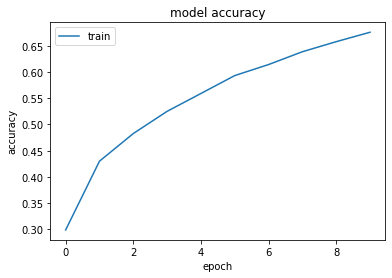

In [ ]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

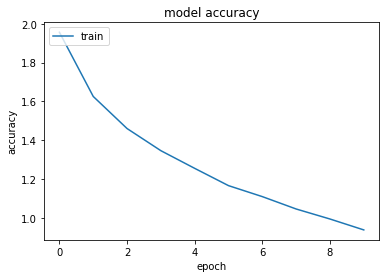

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()